In [386]:
from datetime import datetime

from chart_studio import plotly as py
import plotly.graph_objs as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
import numpy as np
init_notebook_mode(connected=True)
%matplotlib inline

In [175]:
df = pd.read_csv('911.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [176]:
df['zip'].fillna(df['zip'].mean(),inplace=True)

In [177]:
df['zip'].value_counts().head()

19237.658298    12855
19401.000000     6979
19464.000000     6643
19403.000000     4854
19446.000000     4748
Name: zip, dtype: int64

In [178]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [179]:
df['title'].nunique()

110

In [180]:
def changeTitle(st):
    newSt = st
    if 'EMS:' in newSt.split():
        newSt = 'EMS'
        return newSt
    if 'Fire:' in newSt.split():
        newSt = 'Fire'
        return newSt
    if 'Traffic:' in newSt.split():
        newSt = 'Traffic'
        return newSt
    return st

In [181]:
df['Reason'] = df['title']

In [182]:
df['Reason'] = df['Reason'].apply(lambda s : changeTitle(s))

In [183]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

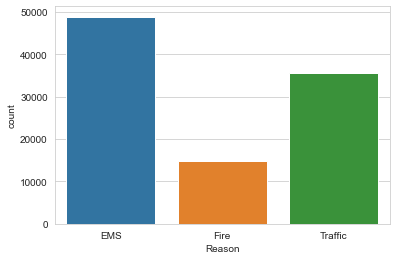

In [184]:
sns.countplot(x='Reason',data=df)

In [185]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [186]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [254]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [202]:
df['timeStamp'] =  pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S.%f')

In [255]:
time=df['timeStamp'].iloc[0]

In [387]:
datetime.fromtimestamp(time)

AttributeError: module 'datetime' has no attribute 'fromtimestamp'

In [349]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [350]:
df['Day'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [351]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)

In [291]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [370]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Day,Year,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.000000,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,3,2015,17,<built-in method date of Timestamp object at 0...
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.000000,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,3,2015,17,<built-in method date of Timestamp object at 0...
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.000000,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,3,2015,17,<built-in method date of Timestamp object at 0...
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.000000,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,3,2015,17,<built-in method date of Timestamp object at 0...
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19237.658298,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,3,2015,17,<built-in method date of Timestamp object at 0...


In [293]:
def numToAlphaDays(s):
    if s == 0:
        return 'Mon'
    if s == 1:
        return 'Tue'
    if s == 2:
        return 'Wed'
    if s == 3:
        return 'Thurs'
    if s == 4:
        return 'Fri'
    if s == 5:
        return 'Sat'
    if s == 6:
        return 'Sun'

In [280]:
def numToAlphaMonths(s):
    if s == 0:
        return 'Mon'
    if s == 1:
        return 'Tue'
    if s == 2:
        return 'Wed'
    if s == 3:
        return 'Thurs'
    if s == 4:
        return 'Fri'
    if s == 5:
        return 'Sat'
    if s == 6:
        return 'Sun'

In [372]:
df['Day'] = df['Day'].apply(lambda day : numToAlphaDays(day))

In [373]:
df['Day']

0        Thurs
1        Thurs
2        Thurs
3        Thurs
4        Thurs
         ...  
99487      Wed
99488      Wed
99489      Wed
99490      Wed
99491      Wed
Name: Day, Length: 99492, dtype: object

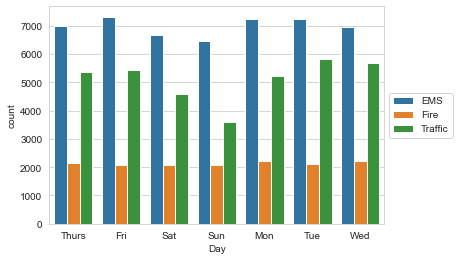

In [297]:
sns.countplot(x='Day',data=df,hue='Reason').legend(loc='center left',bbox_to_anchor=(1,0.5))

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

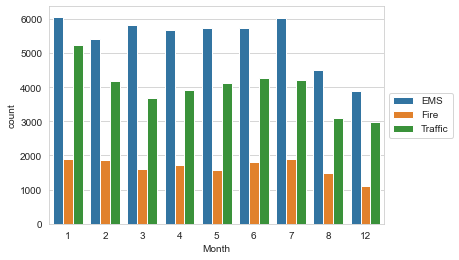

In [343]:
sns.countplot(x='Month',data=df,hue='Reason').legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.tight_layout

In [298]:
byMonth = df.groupby('Month')

In [344]:
byMonth.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Year,Hour
Month,,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969,7969


In [340]:
 byMonth.count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day,Year,Hour
Month,,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423


Month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: zip, dtype: object

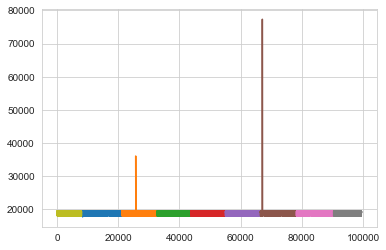

In [354]:
byMonth['zip'].plot()

No handles with labels found to put in legend.


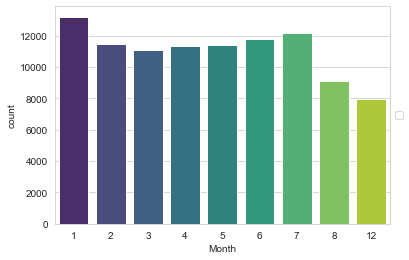

In [353]:
 sns.countplot(x='Month',data=df,palette='viridis').legend(loc='center left',bbox_to_anchor=(1,0.5))

In [ ]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [363]:
t = df['timeStamp'].iloc[0]

In [381]:
t.date

<function Timestamp.date>

In [390]:
df['Date'] =  pd.to_datetime(df['timeStamp']).apply(lambda t:t.date())

In [391]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [392]:
df['Day']

0        Thurs
1        Thurs
2        Thurs
3        Thurs
4        Thurs
         ...  
99487      Wed
99488      Wed
99489      Wed
99490      Wed
99491      Wed
Name: Day, Length: 99492, dtype: object

In [393]:
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [398]:
byDate = df.groupby('Date')

In [400]:
byDate.count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Day,Year,Hour
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,115,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,396,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,403,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,319,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,447,447,447,446,445,447,447,447,447,447,447


<AxesSubplot:xlabel='Date'>

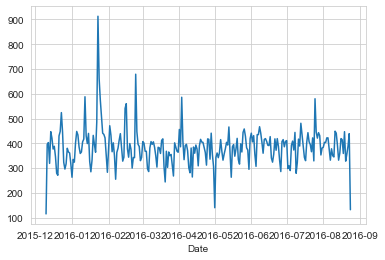

In [402]:
df.groupby('Date').count()['lat'].plot()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

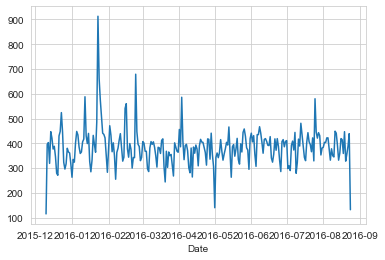

In [407]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout

Text(0.5, 1.0, 'Traffic Data')

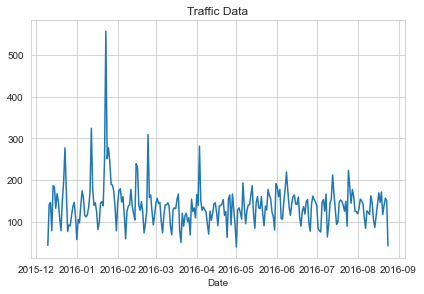

In [450]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic Data')

<AxesSubplot:xlabel='Date'>

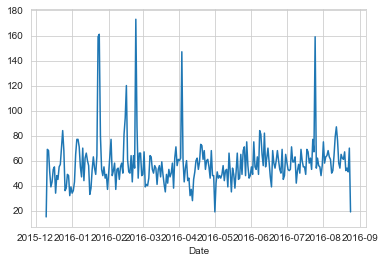

In [412]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()

<AxesSubplot:xlabel='Date'>

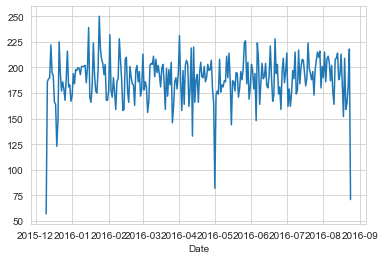

In [414]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()

<AxesSubplot:xlabel='Date'>

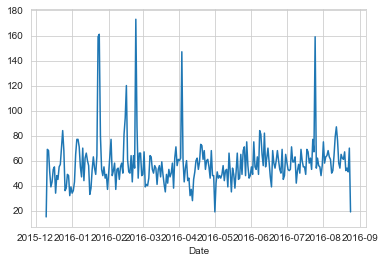

In [421]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()

In [424]:
tempdf = df.copy()

In [425]:
tempdf

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Day,Year,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.000000,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thurs,2015,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.000000,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thurs,2015,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.000000,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,Thurs,2015,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.000000,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thurs,2015,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19237.658298,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,Thurs,2015,17,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.000000,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,8,Wed,2016,11,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.000000,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,8,Wed,2016,11,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.000000,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,8,Wed,2016,11,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.000000,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,8,Wed,2016,11,2016-08-24


In [434]:
dayHour = tempdf.groupby(by=['Day','Hour']).count()['Reason'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day'>

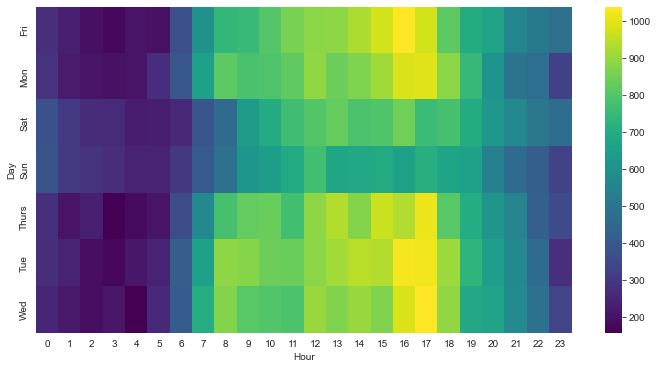

In [437]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

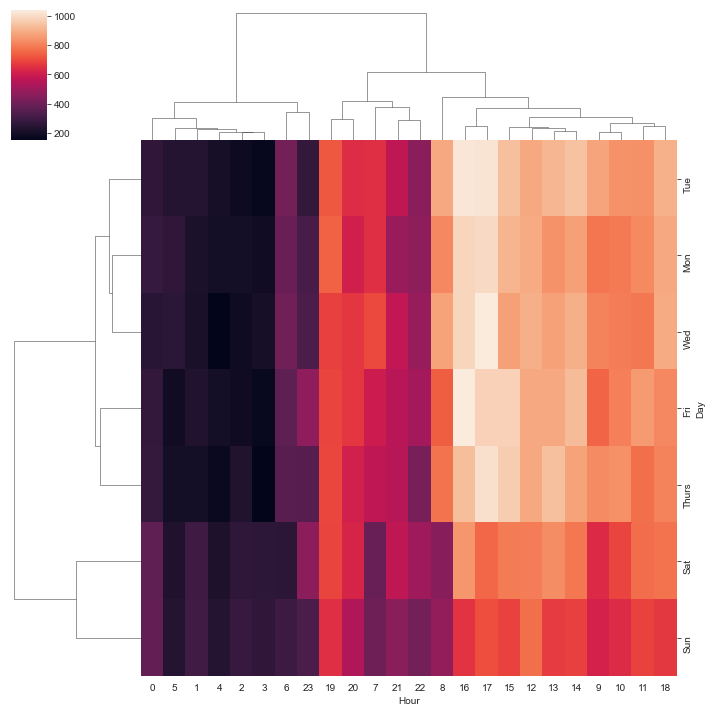

In [438]:
sns.clustermap(dayHour)

In [449]:
monthDF = df.groupby(by=['Day','Month']).count()['Reason'].unstack()

In [448]:
monthDF

Day  Month
Fri  1        1970
     2        1581
     3        1525
     4        1958
     5        1730
              ... 
Wed  5        1538
     6        2058
     7        1717
     8        1295
     12       1262
Name: Reason, Length: 63, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Day'>

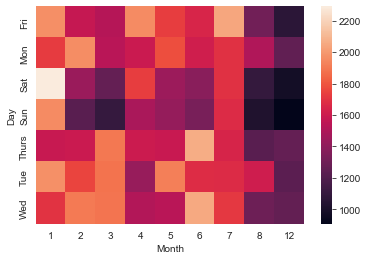

In [445]:
sns.heatmap(monthDF)

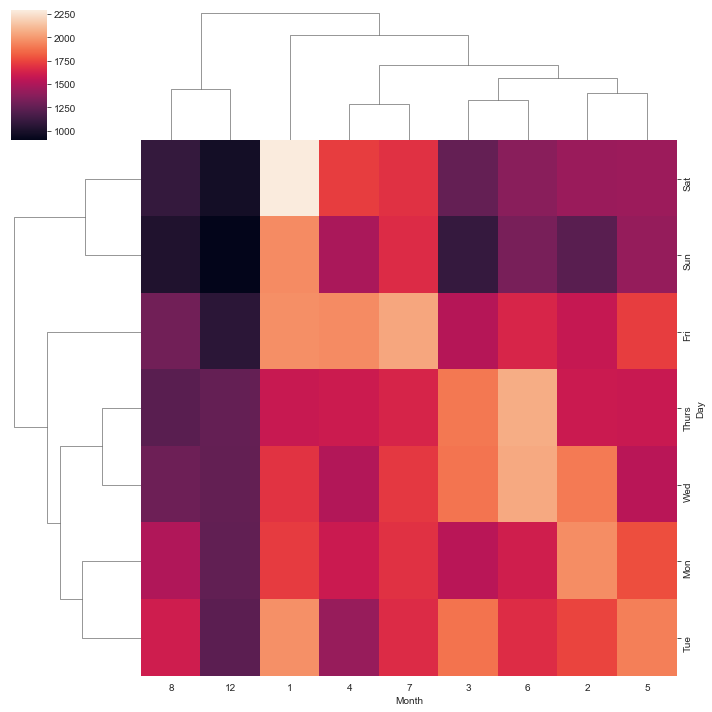

In [446]:
sns.clustermap(monthDF)

In [451]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Day,Year,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.000000,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,Thurs,2015,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.000000,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,Thurs,2015,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.000000,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,Thurs,2015,17,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.000000,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,Thurs,2015,17,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19237.658298,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,Thurs,2015,17,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.000000,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,8,Wed,2016,11,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.000000,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,8,Wed,2016,11,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.000000,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,8,Wed,2016,11,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.000000,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,8,Wed,2016,11,2016-08-24
